In [7]:
#This cell taken from pipeline script

# Import dependencies
import nibabel as nib
import numpy as np
import cv2
import scipy.io
import os
import imageio
import matplotlib.pyplot as plt

# Define file names
SAMPLE_NAME = "DBS_bT20"
HULL_FILE_NAME = os.path.join(SAMPLE_NAME,"hull_rh.mat")
PRECT_FILE_NAME = os.path.join(SAMPLE_NAME,"rpreop_ct.nii")
POSTCT_FILE_NAME = os.path.join(SAMPLE_NAME,"rpostop_ct.nii")
FLUORO_FILE_NAME = os.path.join(SAMPLE_NAME,"fluoro20.tif")

# read .mat File
hull = scipy.io.loadmat(HULL_FILE_NAME)
points_hull=np.array(hull['mask_indices'])

#read pre op CT
prect = nib.load(PRECT_FILE_NAME)
prect_data = np.nan_to_num(np.array(prect.get_fdata()))
Tmatrix = np.transpose(prect.affine)

#read post op CT
postct = nib.load(POSTCT_FILE_NAME)
postct_data = np.nan_to_num(np.array(postct.get_fdata()))

# fourth channel is infrared
fluoro = imageio.imread(FLUORO_FILE_NAME)
fluoro = cv2.cvtColor(fluoro, cv2.COLOR_BGR2GRAY)

In [8]:
# Define ideal inputs from pipeline script
pins_ct = np.array([[209, 147.6262207, 54],[73, 73.0368, 52], [77.19986725, 71, 148], [203, 149.658, 153]])
pins_fl = np.array([[922, 805],[542, 1019], [1399,539]])
coords_2d = np.array([[449,626],[490,575],[536,525],[587,485],[643,452],[706,430],[763,413],[830,405]])

In [9]:
# Run third component function
from fluoro_ct_alignment import project_to_2d
aligned_coords = project_to_2d(postct_data,fluoro,pins_fl,pins_ct,coords_2d)

fluoro_ct_alignment.py successfully executed.


In [19]:
# Display predicted aligned coordinate values. In future, will display coordinates superimposed with fluoro and CT slice images
aligned_coords

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [20]:
# Display ground truth aligned coordinate values.
aligned_coords_gt = np.array([[203,83.00006068],[198,76.00005692],[192,70.00005567],[185,64.00005567],[177,60.00005692],[169,57.00005317],[161, 54.00004941],[151,53.00005442]])
aligned_coords_gt

array([[203.        ,  83.00006068],
       [198.        ,  76.00005692],
       [192.        ,  70.00005567],
       [185.        ,  64.00005567],
       [177.        ,  60.00005692],
       [169.        ,  57.00005317],
       [161.        ,  54.00004941],
       [151.        ,  53.00005442]])

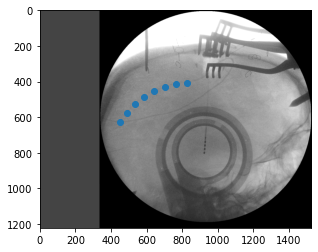

In [11]:
# Display original electrode coordinates on flouro
import matplotlib.pyplot as plt
plt.imshow(fluoro,cmap='gray')
plt.scatter(coords_2d[:,0], coords_2d[:,1])

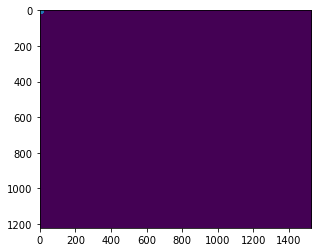

In [18]:
# Display predicted electrode coordinates on black image ('aligned' image)
# For now, this black image represents the 'aligned' image space
import matplotlib.pyplot as plt
plt.imshow(np.zeros([fluoro.shape[0],fluoro.shape[1]]))
plt.scatter(aligned_coords[:,0], aligned_coords[:,1])

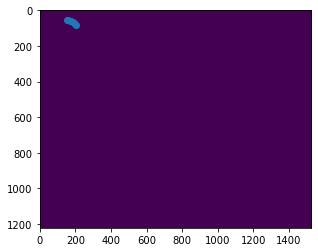

In [21]:
# Display the ground truth aligned electrode coordinates on black image
# For now, this black image represents the 'aligned' image space
import matplotlib.pyplot as plt
plt.imshow(np.zeros([fluoro.shape[0],fluoro.shape[1]]))
plt.scatter(aligned_coords_gt[:,0], aligned_coords_gt[:,1])

In [24]:
# Calculate mean absolute error between predicted and ground truth sets of aligned coordinates
MAE = np.mean(np.abs(aligned_coords_gt - aligned_coords))
MAE

122.06252767875